# <center>MANOJ KUMAR - 2048015</center>

##### Requirement 
For the given anonymous dataset of size 199x35 perform the following task:
1. Exploratory Data analysis to study the nature of the data and to decide whether to follow a  parametric approach or non parametric approach for predicting the target.
2. Preprocessing
3. Dimensionality reduction
4. Model building
5. Model Evaluation



**NOTE: Register Number 1 to 20 will perform  prediction on column named predictLabel2(continuous value)**

In [1]:
#Importing libraries
import numpy as np
import pandas as pd

#Importing the visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
#Reading the data
MainDataset = pd.read_csv('AnonymousDataset.csv')
best_df = MainDataset
data = MainDataset

## Perform Exploratory data analysis

In [3]:
MainDataset.head(3)

,col1,classLabel,col3,col4,col5,col6,col7,col8,col9,col10,...,col26,col27,col28,col29,col30,col31,col32,col33,PredictLabel1,PredictLabel2
0,119513,0,31,18.02,27.60,117.5,1013.0,0.09489,0.1036,0.1086,...,139.7,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,0,61,17.99,10.38,122.8,1001.0,0.11840,0.2776,0.3001,...,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,0,116,21.37,17.44,137.5,1373.0,0.08836,0.1189,0.1255,...,159.1,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0


Regression predictive modeling problem.

In [4]:
print(f"Totally AnonymousDataset contains, {MainDataset.shape[1]} columns and {MainDataset.shape[0]} Rows")

Totally AnonymousDataset contains, 35 columns and 198 Rows


In [5]:
MainDataset.head().T

,0,1,2,3,4
col1,119513,8423,842517,843483,843584
classLabel,0,0,0,0,1
col3,31,61,116,123,27
col4,18.02,17.99,21.37,11.42,20.29
col5,27.6,10.38,17.44,20.38,14.34
col6,117.5,122.8,137.5,77.58,135.1
col7,1013,1001,1373,386.1,1297
col8,0.09489,0.1184,0.08836,0.1425,0.1003
col9,0.1036,0.2776,0.1189,0.2839,0.1328
col10,0.1086,0.3001,0.1255,0.2414,0.198


In [6]:
MainDataset.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,198.0,1.990469e+06,2.889025e+06,8423.000000,855745.250000,886339.000000,927995.750000,9.411300e+06
classLabel,198.0,2.373737e-01,4.265517e-01,0.000000,0.000000,0.000000,0.000000,1.000000e+00
col3,198.0,4.673232e+01,3.446287e+01,1.000000,14.000000,39.500000,72.750000,1.250000e+02
col4,198.0,1.741232e+01,3.161676e+00,10.950000,15.052500,17.290000,19.580000,2.722000e+01
col5,198.0,2.227601e+01,4.298290e+00,10.380000,19.412500,21.750000,24.655000,3.928000e+01
col6,198.0,1.148566e+02,2.138340e+01,71.900000,98.160000,113.700000,129.650000,1.821000e+02
col7,198.0,9.700409e+02,3.521492e+02,361.600000,702.525000,929.100000,1193.500000,2.250000e+03
col8,198.0,1.026814e-01,1.252243e-02,0.074970,0.093900,0.101900,0.110975,1.447000e-01
col9,198.0,1.426478e-01,4.989760e-02,0.046050,0.110200,0.131750,0.172200,3.114000e-01
col10,198.0,1.562428e-01,7.057226e-02,0.023980,0.106850,0.151350,0.200500,4.268000e-01


In [7]:
MainDataset.isnull().sum().sort_values(ascending=False)

PredictLabel2    0
col9             0
col15            0
col14            0
col13            0
col12            0
col11            0
col10            0
col8             0
col17            0
col7             0
col6             0
col5             0
col4             0
col3             0
classLabel       0
col16            0
col18            0
PredictLabel1    0
col27            0
col33            0
col32            0
col31            0
col30            0
col29            0
col28            0
col26            0
col19            0
col25            0
col24            0
col23            0
col22            0
col21            0
col20            0
col1             0
dtype: int64

In [8]:
for i in MainDataset.columns:
    print(f'{i} \t \t \t : \t {MainDataset[i].nunique()} values')

col1 	 	 	 : 	 198 values
classLabel 	 	 	 : 	 2 values
col3 	 	 	 : 	 95 values
col4 	 	 	 : 	 177 values
col5 	 	 	 : 	 193 values
col6 	 	 	 : 	 181 values
col7 	 	 	 : 	 192 values
col8 	 	 	 : 	 179 values
col9 	 	 	 : 	 192 values
col10 	 	 	 : 	 196 values
col11 	 	 	 : 	 189 values
col12 	 	 	 : 	 175 values
col13 	 	 	 : 	 194 values
col14 	 	 	 : 	 196 values
col15 	 	 	 : 	 191 values
col16 	 	 	 : 	 192 values
col17 	 	 	 : 	 196 values
col18 	 	 	 : 	 196 values
col19 	 	 	 : 	 193 values
col20 	 	 	 : 	 192 values
col21 	 	 	 : 	 187 values
col22 	 	 	 : 	 189 values
col23 	 	 	 : 	 195 values
col24 	 	 	 : 	 182 values
col25 	 	 	 : 	 187 values
col26 	 	 	 : 	 183 values
col27 	 	 	 : 	 191 values
col28 	 	 	 : 	 172 values
col29 	 	 	 : 	 191 values
col30 	 	 	 : 	 197 values
col31 	 	 	 : 	 185 values
col32 	 	 	 : 	 192 values
col33 	 	 	 : 	 189 values
PredictLabel1 	 	 	 : 	 39 values
PredictLabel2 	 	 	 : 	 23 values


In [9]:
numerical_features = []
categorical_features = []

for i in MainDataset.columns:
    if MainDataset[i].nunique()>7:
        numerical_features.append(i)
    else:
        categorical_features.append(i)
        

print(len(numerical_features))
print(len(categorical_features))

34
1


In [10]:
# Numerical features:
print("Numerical features : ",numerical_features)

# Categorical features:
print("\n Categorical features : ",categorical_features)

Numerical features :  ['col1', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9', 'col10', 'col11', 'col12', 'col13', 'col14', 'col15', 'col16', 'col17', 'col18', 'col19', 'col20', 'col21', 'col22', 'col23', 'col24', 'col25', 'col26', 'col27', 'col28', 'col29', 'col30', 'col31', 'col32', 'col33', 'PredictLabel1', 'PredictLabel2']

 Categorical features :  ['classLabel']


In [11]:
# checking for unique values in categorical features:

for feats in categorical_features:
    print(f'{feats} has {MainDataset[feats].unique()} categories.\n')

classLabel has [0 1] categories.



In [12]:
numerical_features.remove('col1')

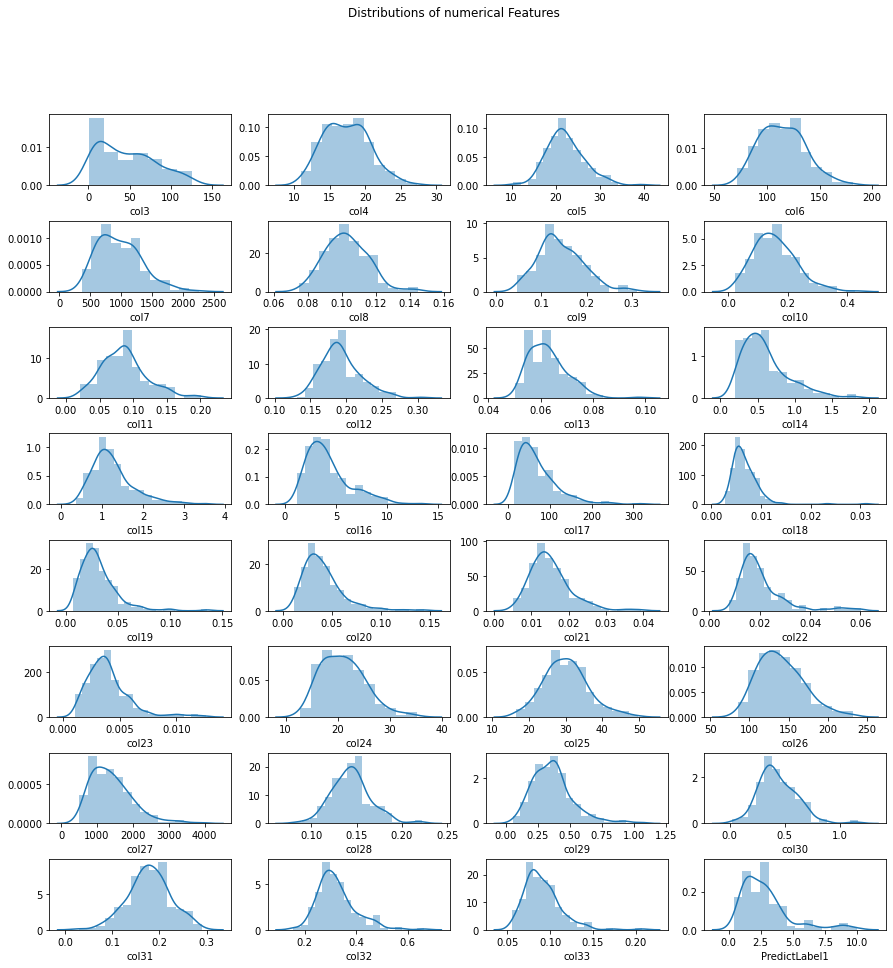

In [13]:
# Checking distribution of the numerical features:

fig, axes = plt.subplots(nrows=8, ncols=4, figsize=(15,15))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of numerical Features')


for ax, feats in zip(axes.flatten(), numerical_features):
    sns.distplot(a=MainDataset[feats], ax=ax)

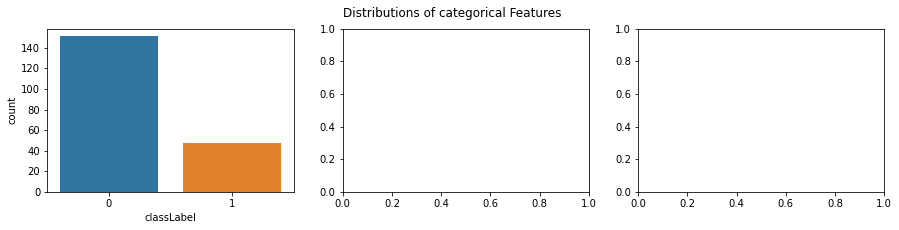

In [14]:
# Checking the label distribution for categorical data:

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,3))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of categorical Features')


for ax, feats in zip(axes.flatten(), categorical_features):
    sns.countplot(MainDataset[feats], ax=ax)

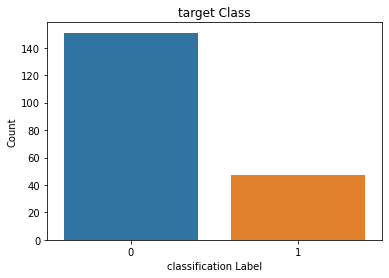

In [15]:
sns.countplot(x='classLabel',data=MainDataset)
plt.xlabel("classification Label")
plt.ylabel("Count")
plt.title("target Class")
plt.show()

## Data cleaning & Pre-processing

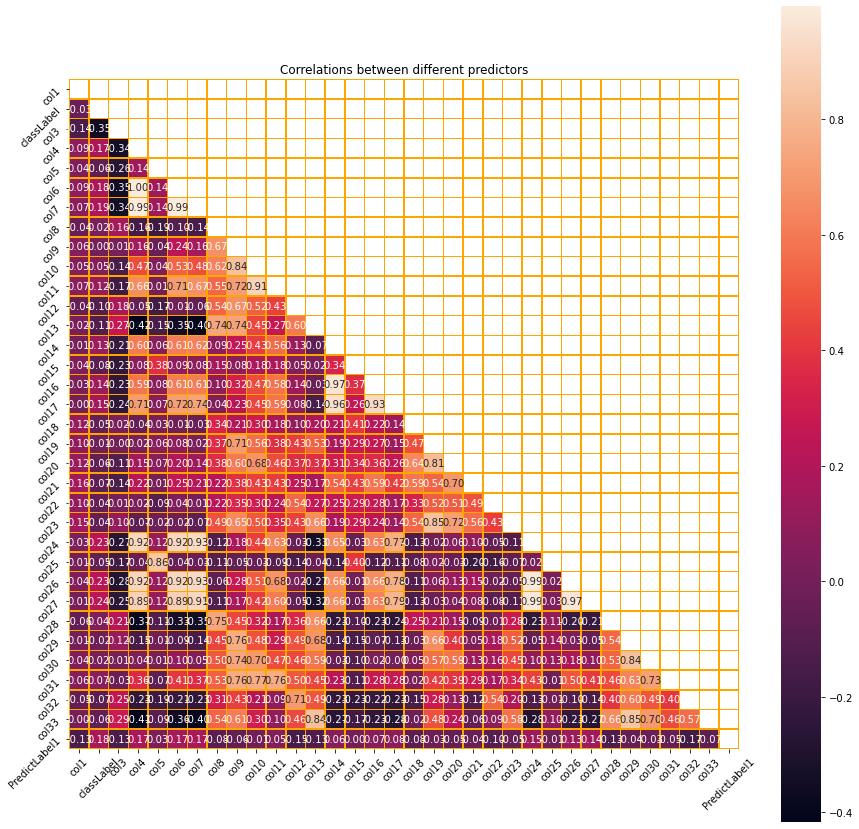

In [17]:
corr_df = MainDataset.corr()

f,ax=plt.subplots(figsize=(15,15))
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_df,annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange", mask = mask, square=True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Correlations between different predictors')
plt.show()

In [18]:
df = MainDataset

In [19]:
corr_df = df.corr()
corr_df
cm = sns.light_palette("brown", as_cmap=True)
corr_df.style.background_gradient(cmap=cm)

## Perform Feature Selection Techniques

Numerical Input, Numerical Output


This is a regression predictive modeling problem with numerical input variables.
The most common techniques are to use a correlation coefficient, such as Pearson’s for a linear correlation, or rank-based methods for a nonlinear correlation.


1. Pearson’s correlation coefficient (linear).

2. Spearman’s rank coefficient (nonlinear)


In [20]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score

from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

import warnings
warnings.filterwarnings('ignore')

In [21]:
# Encoding categorical variables into numbers
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(198, 34)

In [23]:
data

,col1,classLabel,col3,col4,col5,col6,col7,col8,col9,col10,...,col25,col26,col27,col28,col29,col30,col31,col32,col33,PredictLabel1
0,119513,0,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,...,37.08,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0
1,8423,0,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,...,17.33,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0
2,842517,0,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,...,20.98,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5
3,843483,0,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,...,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0
4,843584,1,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,...,16.67,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,942640,0,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,...,24.81,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0
194,943471,0,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,...,41.48,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5
195,94547,0,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,...,36.66,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7
196,947204,1,3,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,...,27.98,198.30,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0


In [24]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=["col1"], axis=1),
    data['PredictLabel1'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape 

((138, 33), (60, 33))

In [25]:

# find and remove correlated features
# in order to reduce the feature space a bit
# so that the algorithm takes shorter

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  14


In [26]:

# removed correlated  features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((138, 19), (60, 19))

In [27]:
X_train.columns[0:10]

Index(['classLabel', 'col3', 'col4', 'col5', 'col8', 'col9', 'col12', 'col13',
       'col14', 'col15'],
      dtype='object')

In [28]:
# exhaustive feature selection
# Using 10 features with ROC_AUC Scoring

efs1 = EFS(RandomForestClassifier(n_jobs=4, random_state=0), 
           min_features=1,
           max_features=4, 
           scoring='roc_auc',
           print_progress=True,
           cv=2)

In [29]:
def run_randomForests(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)
    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [35]:
X_train

,classLabel,col3,col4,col5,col8,col9,col12,col13,col14,col15,col18,col19,col21,col22,col28,col29,col31,col32,PredictLabel1
139,0,13,19.55,23.21,0.10100,0.1318,0.1989,0.05884,0.6107,2.8360,0.011240,0.04097,0.03441,0.02768,0.1251,0.2414,0.1825,0.2576,4.0
80,0,86,14.22,23.12,0.10750,0.2413,0.2384,0.07542,0.2860,2.1100,0.007970,0.13540,0.01666,0.05113,0.1533,0.9327,0.1772,0.5166,1.2
19,0,116,17.14,16.40,0.11860,0.2276,0.3040,0.07413,1.0460,0.9760,0.008029,0.03799,0.02397,0.02308,0.1545,0.3949,0.2550,0.4066,4.4
159,1,11,20.59,21.24,0.10850,0.1644,0.1848,0.06222,0.5904,1.2160,0.006666,0.02791,0.01479,0.01117,0.1464,0.3597,0.2113,0.2480,5.5
90,0,74,17.42,25.56,0.10060,0.1146,0.1308,0.05866,0.5296,1.6670,0.031130,0.08555,0.03927,0.02175,0.1243,0.1793,0.1099,0.1603,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,1,44,17.68,20.74,0.11150,0.1665,0.1971,0.06166,0.8113,1.4000,0.009037,0.04954,0.01841,0.01778,0.1418,0.3498,0.1515,0.2463,9.0
192,0,3,14.72,25.26,0.11740,0.2112,0.2079,0.07496,0.3405,1.1580,0.004957,0.04553,0.01597,0.02539,0.1464,0.5352,0.1974,0.3778,1.7
117,0,17,19.71,19.06,0.10180,0.1352,0.1895,0.05863,0.4352,1.0490,0.004996,0.02395,0.01117,0.02266,0.1411,0.3993,0.1925,0.4054,4.0
47,0,97,19.55,15.49,0.10790,0.1747,0.2616,0.06752,1.2230,0.4489,0.011010,0.04272,0.02737,0.06041,0.1534,0.3391,0.2200,0.4714,3.0


In [41]:
# removed correlated  features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((138, 19), (60, 19))

In [43]:
main_list = ['classLabel', 'col3', 'col4', 'col5', 'col8', 'col9', 'col12', 'col13',
       'col14', 'col15','PredictLabel2']

df_final = best_df[main_list]

## Modelling

In [44]:
df_final

,classLabel,col3,col4,col5,col8,col9,col12,col13,col14,col15,PredictLabel2
0,0,31,18.02,27.60,0.09489,0.10360,0.1865,0.06333,0.6249,1.8900,5
1,0,61,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,2
2,0,116,21.37,17.44,0.08836,0.11890,0.2333,0.06010,0.5854,0.6105,0
3,0,123,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0
4,1,27,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0
...,...,...,...,...,...,...,...,...,...,...,...
193,0,10,22.52,21.92,0.07592,0.09162,0.1728,0.05262,1.3740,2.3120,2
194,0,8,15.44,31.18,0.09399,0.10620,0.1735,0.06105,0.3235,1.8390,0
195,0,12,17.17,29.19,0.08952,0.06655,0.1793,0.05392,0.6101,1.4250,0
196,1,3,21.42,22.84,0.10700,0.19390,0.1884,0.06472,1.0850,0.8469,?


In [67]:
# blood_glucose_random blood_urea serum_creatinine sodium potassium haemoglobin packed_cell_volume

X = df_final[["col12"]]
Y = df_final[["col8"]]

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y) #, test_size=0.3, random_state=101)

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [69]:
#Training Accuracy
linreg.score(X_train,y_train)

#Prediction
prediction=linreg.predict(X_test)

In [70]:
from sklearn import metrics
print("MAE: ",metrics.mean_absolute_error(y_test,prediction))
print("MSE: ",metrics.mean_squared_error(y_test,prediction))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,prediction)))


MAE:  0.008347858189671122
MSE:  0.0001092432823094501
RMSE:  0.010451951124524555


In [71]:
coef=pd.DataFrame()
coef['Features'] = X.columns.values
coef['Coefficients'] = linreg.coef_
coef

,Features,Coefficients
0,col12,0.24215


In [72]:
#Testing Accuracy
linreg.score(X_test,y_test)

0.32435067673638807